Logistic Regression
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90       736
        >50K       0.75      0.61      0.67       264

    accuracy                           0.84      1000
   macro avg       0.81      0.77      0.78      1000
weighted avg       0.84      0.84      0.84      1000

SVM
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90       736
        >50K       0.75      0.61      0.67       264

    accuracy                           0.84      1000
   macro avg       0.81      0.77      0.78      1000
weighted avg       0.84      0.84      0.84      1000

KNN
               precision    recall  f1-score   support

       <=50K       0.84      0.88      0.86       736
        >50K       0.61      0.55      0.58       264

    accuracy                           0.79      1000
   macro avg       0.73      0.71      0.72      1000
weighted avg       0.78      0.79      0.79

C:\Users\Szymon\AppData\Local\Temp\ipykernel_26436\3580348221.py:72: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c="green", cmap='jet')


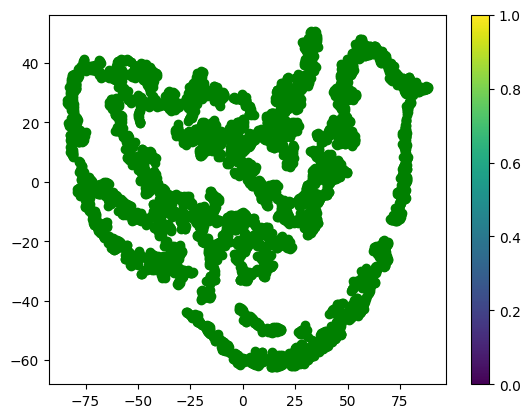

In [ ]:
# Importowanie niezbędnych bibliotek
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Importowanie zbioru danych z UCI
from ucimlrepo import fetch_ucirepo

# Pobieranie zbioru danych
adult = fetch_ucirepo(id=2)

# Dane (jako ramki danych pandas)
X = adult.data.features
y = adult.data.targets

# Ograniczenie zbioru danych do 5000 próbek
X = X[:5000]
y = y[:5000]

# Kodowanie zmiennych tekstowych na wartości numeryczne
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = preprocessor.fit_transform(X)

# Konwersja y do jednowymiarowej tablicy
y = y.values.ravel()

# Przygotowanie danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenowanie klasyfikatorów
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predykcja i ocena wyników
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression\n", classification_report(y_test, y_pred_log_reg))

y_pred_svm = svm.predict(X_test)
print("SVM\n", classification_report(y_test, y_pred_svm))

y_pred_knn = knn.predict(X_test)
print("KNN\n", classification_report(y_test, y_pred_knn))

# Redukcja wymiarowości przy użyciu TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Wizualizacja wyników - t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_svd)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c="green", cmap='jet')
plt.colorbar()
plt.show()
